In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler 
import numpy as np

In [2]:
data = pd.read_csv("jfk_weather_cleaned.csv")

In [3]:
data.head()

,DATE,VISIBILITY,DRYBULBTEMPF,WETBULBTEMPF,DewPointTempF,RelativeHumidity,WindSpeed,WindDirection,StationPressure,SeaLevelPressure,Precip
0,2010-01-01 00:51:00,6.0,33,32,31,92,0,0,29.97,29.99,0.01
1,2010-01-01 01:51:00,6.0,33,33,32,96,0,0,29.97,29.99,0.02
2,2010-01-01 02:51:00,5.0,33,33,32,96,0,0,29.97,29.99,0.02
3,2010-01-01 03:51:00,5.0,33,33,32,96,0,0,29.95,29.97,0.02
4,2010-01-01 04:51:00,5.0,33,32,31,92,0,0,29.93,29.96,0.02


In [4]:
data.isna().sum()

DATE                0
VISIBILITY          0
DRYBULBTEMPF        0
WETBULBTEMPF        0
DewPointTempF       0
RelativeHumidity    0
WindSpeed           0
WindDirection       0
StationPressure     0
SeaLevelPressure    0
Precip              0
dtype: int64

In [5]:
data.describe()

,VISIBILITY,DRYBULBTEMPF,WETBULBTEMPF,DewPointTempF,RelativeHumidity,WindSpeed,WindDirection,StationPressure,SeaLevelPressure,Precip
count,75083.000000,75083.000000,75083.000000,75083.000000,75083.000000,75083.000000,75083.000000,75083.000000,75083.000000,75083.000000
mean,9.211896,55.355527,49.327544,42.424024,64.812075,11.253240,196.550751,30.005579,30.026049,0.005478
std,2.202311,17.394334,16.182867,19.577957,19.898962,6.101048,107.692804,0.235172,0.234069,0.036161
min,0.000000,1.000000,-1.000000,-19.000000,8.000000,0.000000,0.000000,28.520000,28.540000,0.000000
25%,10.000000,42.000000,36.000000,27.000000,49.000000,7.000000,110.000000,29.860000,29.880000,0.000000
50%,10.000000,56.000000,50.000000,44.000000,66.000000,10.000000,200.000000,30.000000,30.020000,0.000000
75%,10.000000,70.000000,64.000000,59.000000,82.000000,15.000000,290.000000,30.150000,30.170000,0.000000
max,14.000000,102.000000,85.000000,84.000000,100.000000,53.000000,360.000000,30.830000,30.850000,2.410000


There are no missing values.

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

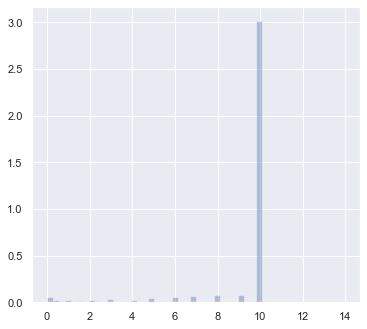

In [6]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data.drop(['DATE'],axis=1):
    ax = plt.subplot(4,3,plotnumber)
    sns.distplot(data[column])
    plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [6]:
#let's scale our data
scale = StandardScaler()

In [7]:
X = data.drop(['DATE','VISIBILITY'],axis=1)
y = data['VISIBILITY']

In [8]:
X_scaled = scale.fit_transform(X)

In [9]:
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)

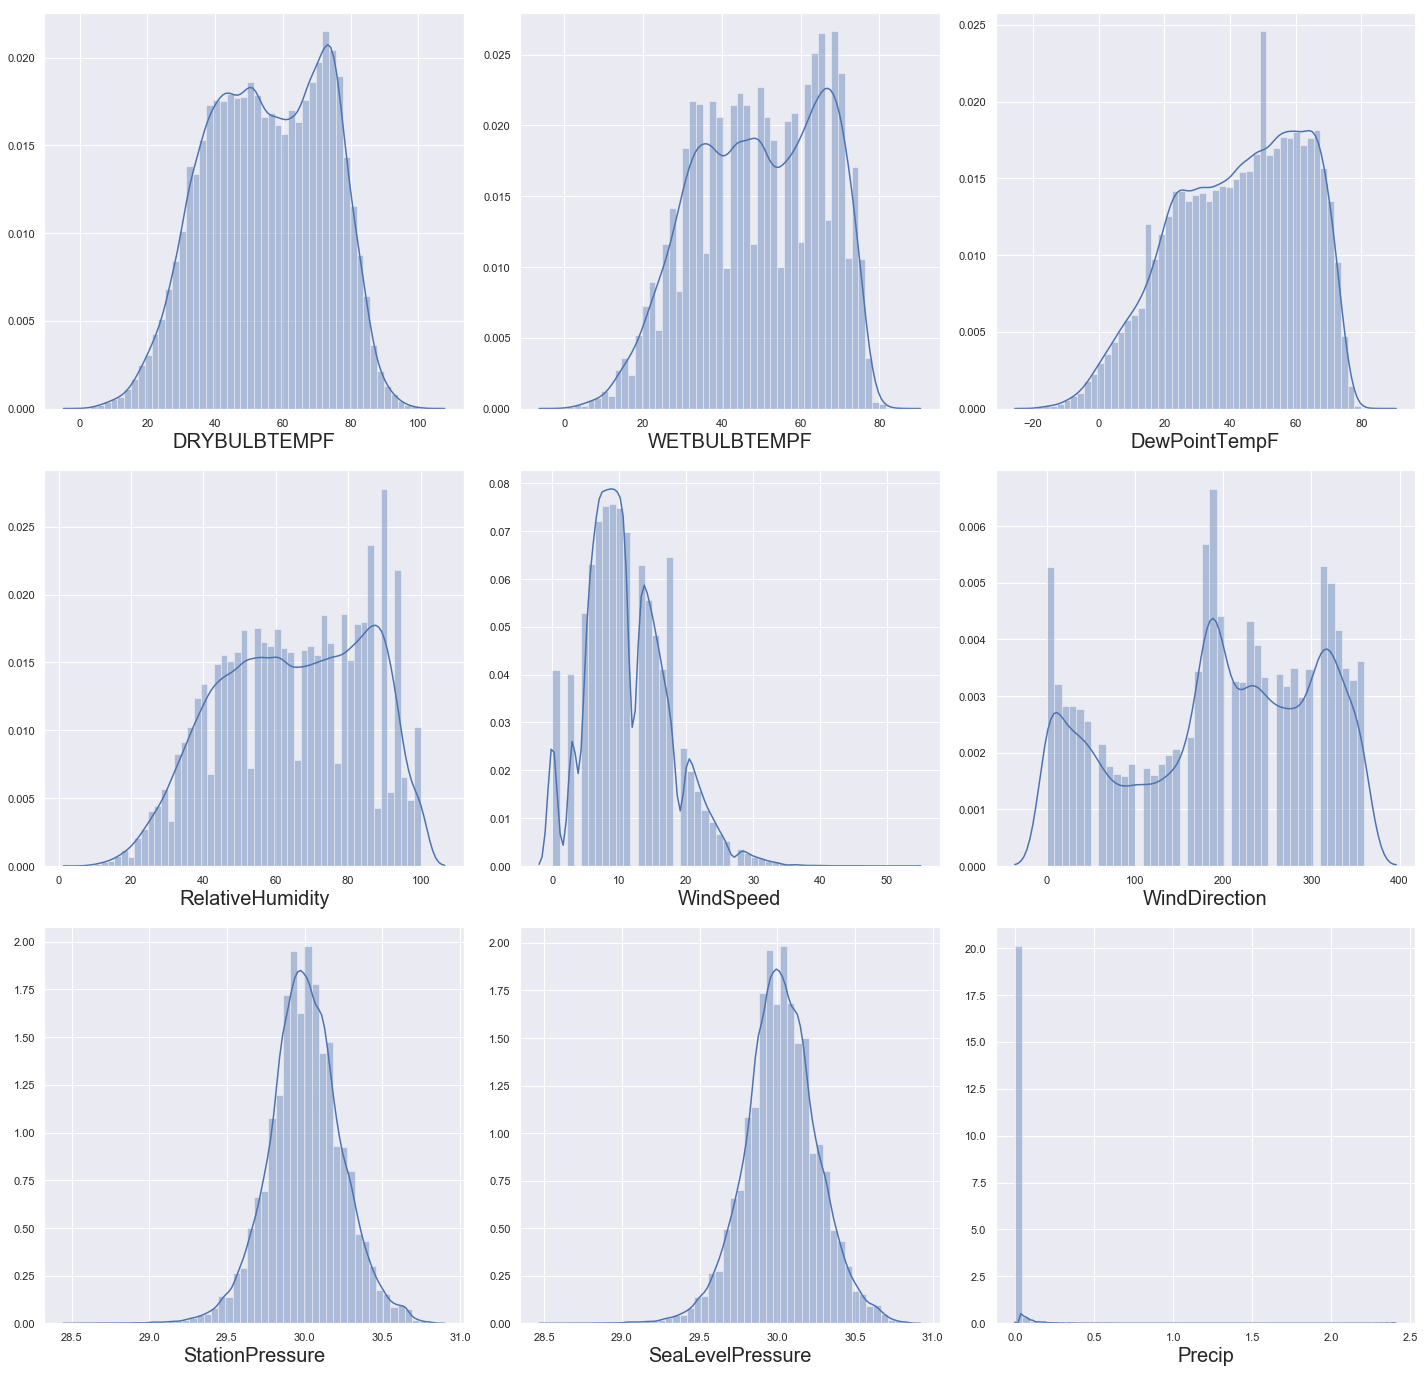

In [39]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    ax = plt.subplot(4,3,plotnumber)
    sns.distplot(X[column])
    plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

We can see some columns are not following normal distribution.

we will use such algorithms which do not require normal distribution such as decision tree and XGBoost.

Also, precipitation column has most of data value near 0. It won't be very useful for our analysis. 
Let's drop this column.

Let's check correlation between the columns :

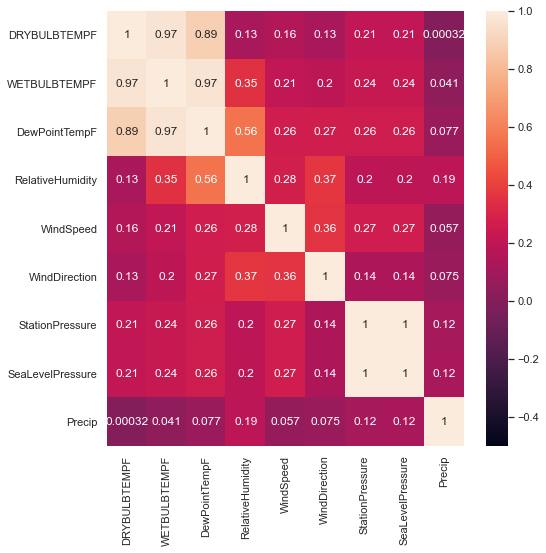

In [10]:
plt.figure(figsize=(8,8))
plt_data =X
    #ax = plot.subplot(5,3,plotnumber)
sns.heatmap(plt_data.corr().abs(), vmin = -0.5,vmax = 1,annot=True) #matplotlib  3.0.3 , ther eis an issue with 3.1.1 , annotation gets cut from top and bottom

#     plot.xlabel(column,fontsize=20)
#     #plt.ylabel('Salary',fontsize=20)
#     plot.ylabel("Calories")
#     plotnumber+=1

There is clear correaltion between some columns.

Let's drop the columns with high correlaion.

In [11]:
X_ = X.drop(['WETBULBTEMPF','DewPointTempF','StationPressure'],axis=1)

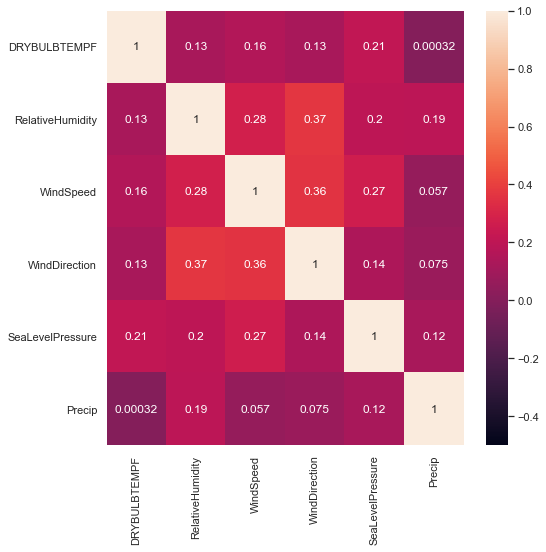

In [12]:
plt.figure(figsize=(8,8))
plt_data =X_
    #ax = plot.subplot(5,3,plotnumber)
sns.heatmap(plt_data.corr().abs(), vmin = -0.5,vmax = 1,annot=True) #matplotlib  3.0.3 , ther eis an issue with 3.1.1 , annotation gets cut from top and bottom

#     plot.xlabel(column,fontsize=20)
#     #plt.ylabel('Salary',fontsize=20)
#     plot.ylabel("Calories")
#     plotnumber+=1

In [13]:
from sklearn.tree import DecisionTreeRegressor

In [14]:
scr = DecisionTreeRegressor()

In [89]:
from sklearn.model_selection import GridSearchCV

In [93]:
param_grid_knn = {"criterion" : ["mse", "friedman_mse", "mae"],
"splitter" : ["best", "random"],
"max_features" :["auto", "sqrt", "log2"],
'max_depth': range(2,16,2),
'min_samples_split': range(2,16,2)    
                 }
    
    

In [94]:
grid =GridSearchCV(scr,param_grid_knn, verbose=3,cv=5)
            # finding the best parameters



In [96]:
grid.fit(X_, y)

Fitting 5 folds for each of 882 candidates, totalling 4410 fits
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_split=2, splitter=best 
[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_split=2, splitter=best, score=0.460, total=   0.1s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_split=2, splitter=best 
[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_split=2, splitter=best, score=0.493, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_split=2, splitter=best 
[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_split=2, splitter=best, score=0.440, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_split=2, splitter=best 
[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_split=2, splitter=best, score=0.426, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_split=2, splitter=best 
[CV]  criterion=mse, max_depth=2

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_split=2, splitter=random, score=0.361, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_split=2, splitter=random 
[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_split=2, splitter=random, score=0.030, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_split=2, splitter=random 
[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_split=2, splitter=random, score=0.256, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_split=2, splitter=random 
[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_split=2, splitter=random, score=0.091, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_split=4, splitter=best 
[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_split=4, splitter=best, score=0.460, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, mi

[Parallel(n_jobs=1)]: Done 4410 out of 4410 | elapsed: 988.9min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': range(2, 16, 2),
                         'max_

Great! Let's start with our model training.